# 2-D Visualization Using PCA

In [27]:
# Import all the required modules needed for the PCA.
# PCA : Principal Component Analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Read the dataset.

d=pd.read_csv('MNIST_train.csv')
labels=d['label']
data=d.drop('label',axis=1)

print('The shape of the sample data is:',data.shape)
print('The shape of the labels data is:',labels.shape)

The shape of the sample data is: (42000, 784)
The shape of the labels data is: (42000,)


In [29]:
# Data Preprocessing: Standardising the data.

from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(data)

print('The shape of the standardised data is:',standardised_data.shape)

The shape of the standardised data is: (42000, 784)


In [30]:
# Find the Covariance matrix: (X^T)X

sample_data=standardised_data

# Matrix multiplication using NumPy:

covariance_matrix=np.matmul(sample_data.T, sample_data)
print('The shape of the covariance matrix is:',covariance_matrix.shape)

The shape of the covariance matrix is: (784, 784)


In [31]:
# Finding the top two eigen-values and corresponding eigen-vectors.
# for projecting on a 2-Dimensional space.

from scipy.linalg import eigh

# The parameter 'subset_by_index' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values, vectors=eigh(covariance_matrix, subset_by_index=(782,783))
print('The shape of the eigen-vectors are:',vectors.shape)

# converting the eigen vectors into (2d) shape for easyness.

vectors = vectors.T
print ('The updated shape of eigen vectors are:',vectors.shape)

The shape of the eigen-vectors are: (784, 2)
The updated shape of eigen vectors are: (2, 784)


In [32]:
# Projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication.

new_cordinates=np.matmul(vectors,sample_data.T)

print('The resultant new data points shape is:',vectors.shape,'X',sample_data.T.shape,'=',new_cordinates.shape)

The resultant new data points shape is: (2, 784) X (784, 42000) = (2, 42000)


In [33]:
# Appending labels to the 2 dimensional projected data.

new_cordinates=np.vstack((new_cordinates,labels)).T
print('The shape of the new_cordinates is:',new_cordinates.shape)

# Creating a new data frame for ploting the labeled points.

dataframe=pd.DataFrame(data=new_cordinates,columns=('1st Principal','2nd Principal','label'))
print(dataframe.head())

The shape of the new_cordinates is: (42000, 3)
   1st Principal  2nd Principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


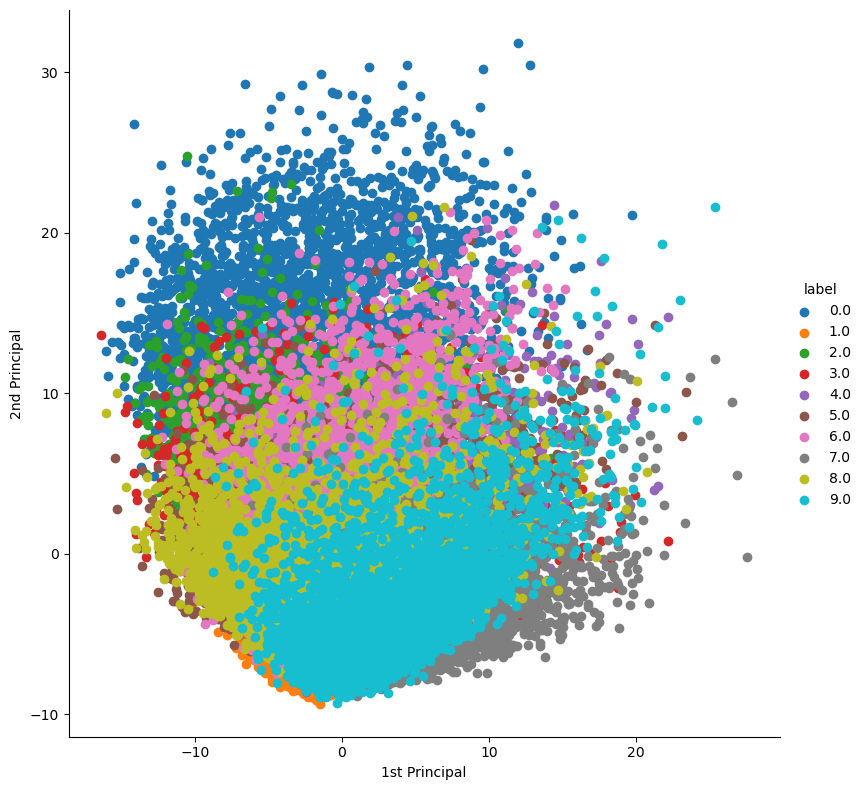

In [34]:
# Plotting the 2-D datapoints with seaborn

import seaborn as sns
sns.FacetGrid(dataframe,hue='label',height=8)\
   .map(plt.scatter,'1st Principal','2nd Principal')\
   .add_legend()
plt.show()

# PCA Using Scikit-Learn

In [43]:
# Initializing the PCA.

from sklearn import decomposition
pca=decomposition.PCA()

In [44]:
# Configuring the parameters.
# The number of components=2

pca.n_components=2
pca_data=pca.fit_transform(sample_data)

# pca reduced will contain the 2-d projects of simple data.

print('The shape of the pca reduced data is:',pca_data.shape)

The shape of the pca reduced data is: (42000, 2)


The shape of the PCA data is: (42000, 3)


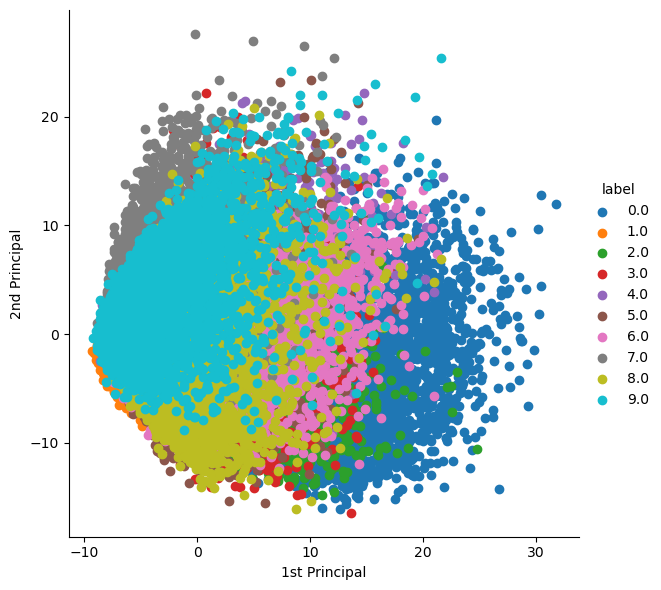

In [45]:
# Attaching the labels for ecah 2-D data point.

pca_data=np.vstack((pca_data.T, labels)).T
print('The shape of the PCA data is:',pca_data.shape)

# Creating a new data fram which help us in ploting the result data.

pca_df=pd.DataFrame(data=pca_data,columns=('1st Principal','2nd Principal','label'))

# Visualize the data with the help of the seaborn.

sns.FacetGrid(pca_df,hue='label',height=6)\
   .map(plt.scatter, '1st Principal','2nd Principal')\
   .add_legend()
plt.show()

# PCA for Dimensionality Reduction( not visualization)

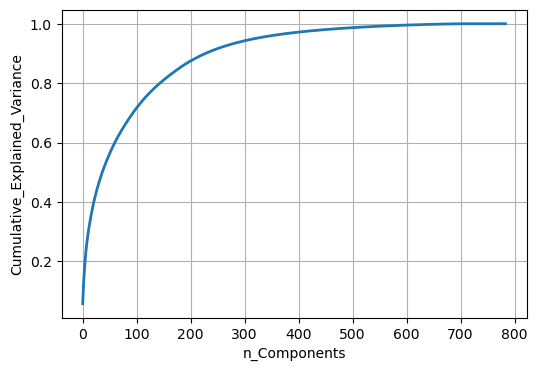

In [49]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

# Plot the PCA Spectrum.
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.xlabel('n_Components')
plt.ylabel('Cumulative_Explained_Variance')
plt.grid()

# If we take 250-Dimensions, approx 90% of variance is explained.